In [1]:
import pandas as pd
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('./datasets/housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [16]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
y_target = df['MEDV']
X_data = df.drop(['MEDV'],axis=1, inplace=False)
rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 folds의 개별 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 folds의 개별 RMSE scores: [2.81 3.63 4.54 6.8  4.34]
5 folds의 개별 RMSE : 4.423


In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)

models = [dt_reg, rf_reg, gb_reg]

for model in models:
    
    neg_mse_scores = cross_val_score(
        model, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('5 folds의 개별 평군의 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 평군의 RMSE : 5.978
5 folds의 개별 평군의 RMSE : 4.423
5 folds의 개별 평군의 RMSE : 4.269


<Axes: >

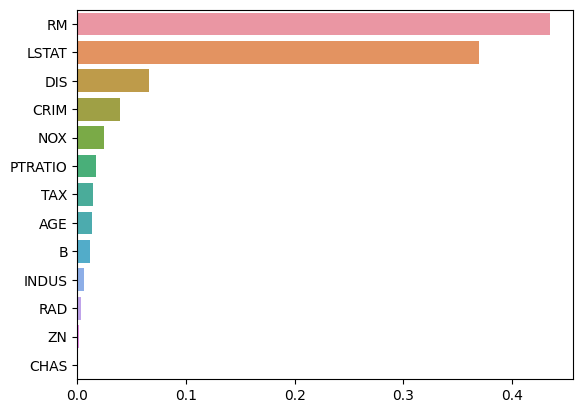

In [4]:
import seaborn as sns
%matplotlib inline
rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_data, y_target)
feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)